In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')


In [2]:
wh = pd.read_csv("happiness_score_dataset.csv")
wh

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
wh.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
wh.shape

(158, 12)

In [5]:
wh.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
wh.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

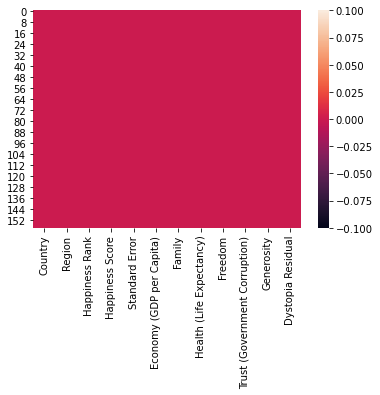

In [8]:
sns.heatmap(wh.isnull())

Above heatmap shows that there is no null value presented in the dataset.

In [9]:
wh.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


It seems that there are no missing value in our data. some cases Mean and median are almost nearest value and some are different so skewness is presented.There are some differents in mean and max so outlier also presented.

In [10]:
wh = wh.drop(columns = ['Region'])
wh.head()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


lets change the country column into numerical using LabelEncoder

In [11]:
le = LabelEncoder()
wh["Country"] = le.fit_transform(wh["Country"])

In [12]:
wh

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [13]:
cor=wh.corr()
cor

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Happiness Rank,-0.098538,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.118085,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301


<AxesSubplot:>

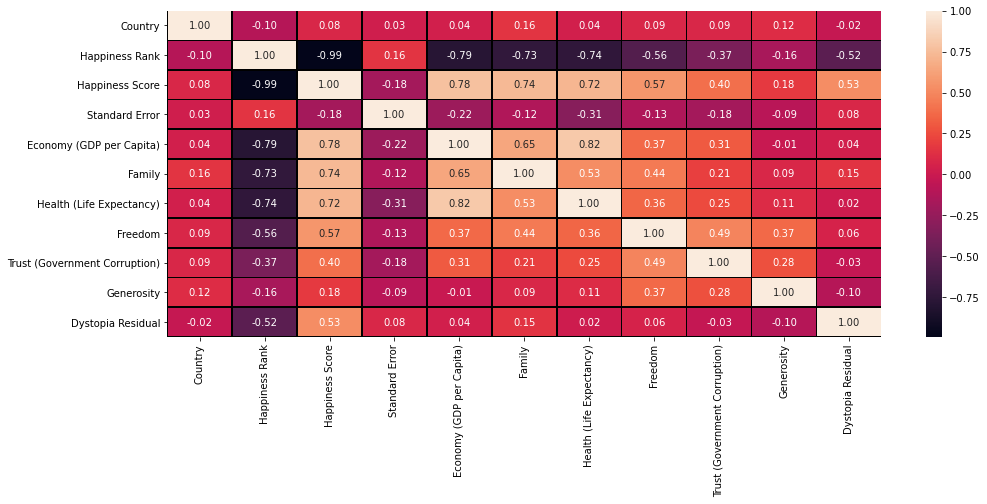

In [14]:
plt.figure(figsize =(16,6))
sns.heatmap(cor,annot=True,linewidths = 0.5,linecolor="black",fmt = '.2f')

 Now we can clearly identify the correlation of independent variable with target variable Happiness Score.Here Health(Life Expectancy ) and Economy(GDP per capita) are highly correlated(0.82)       

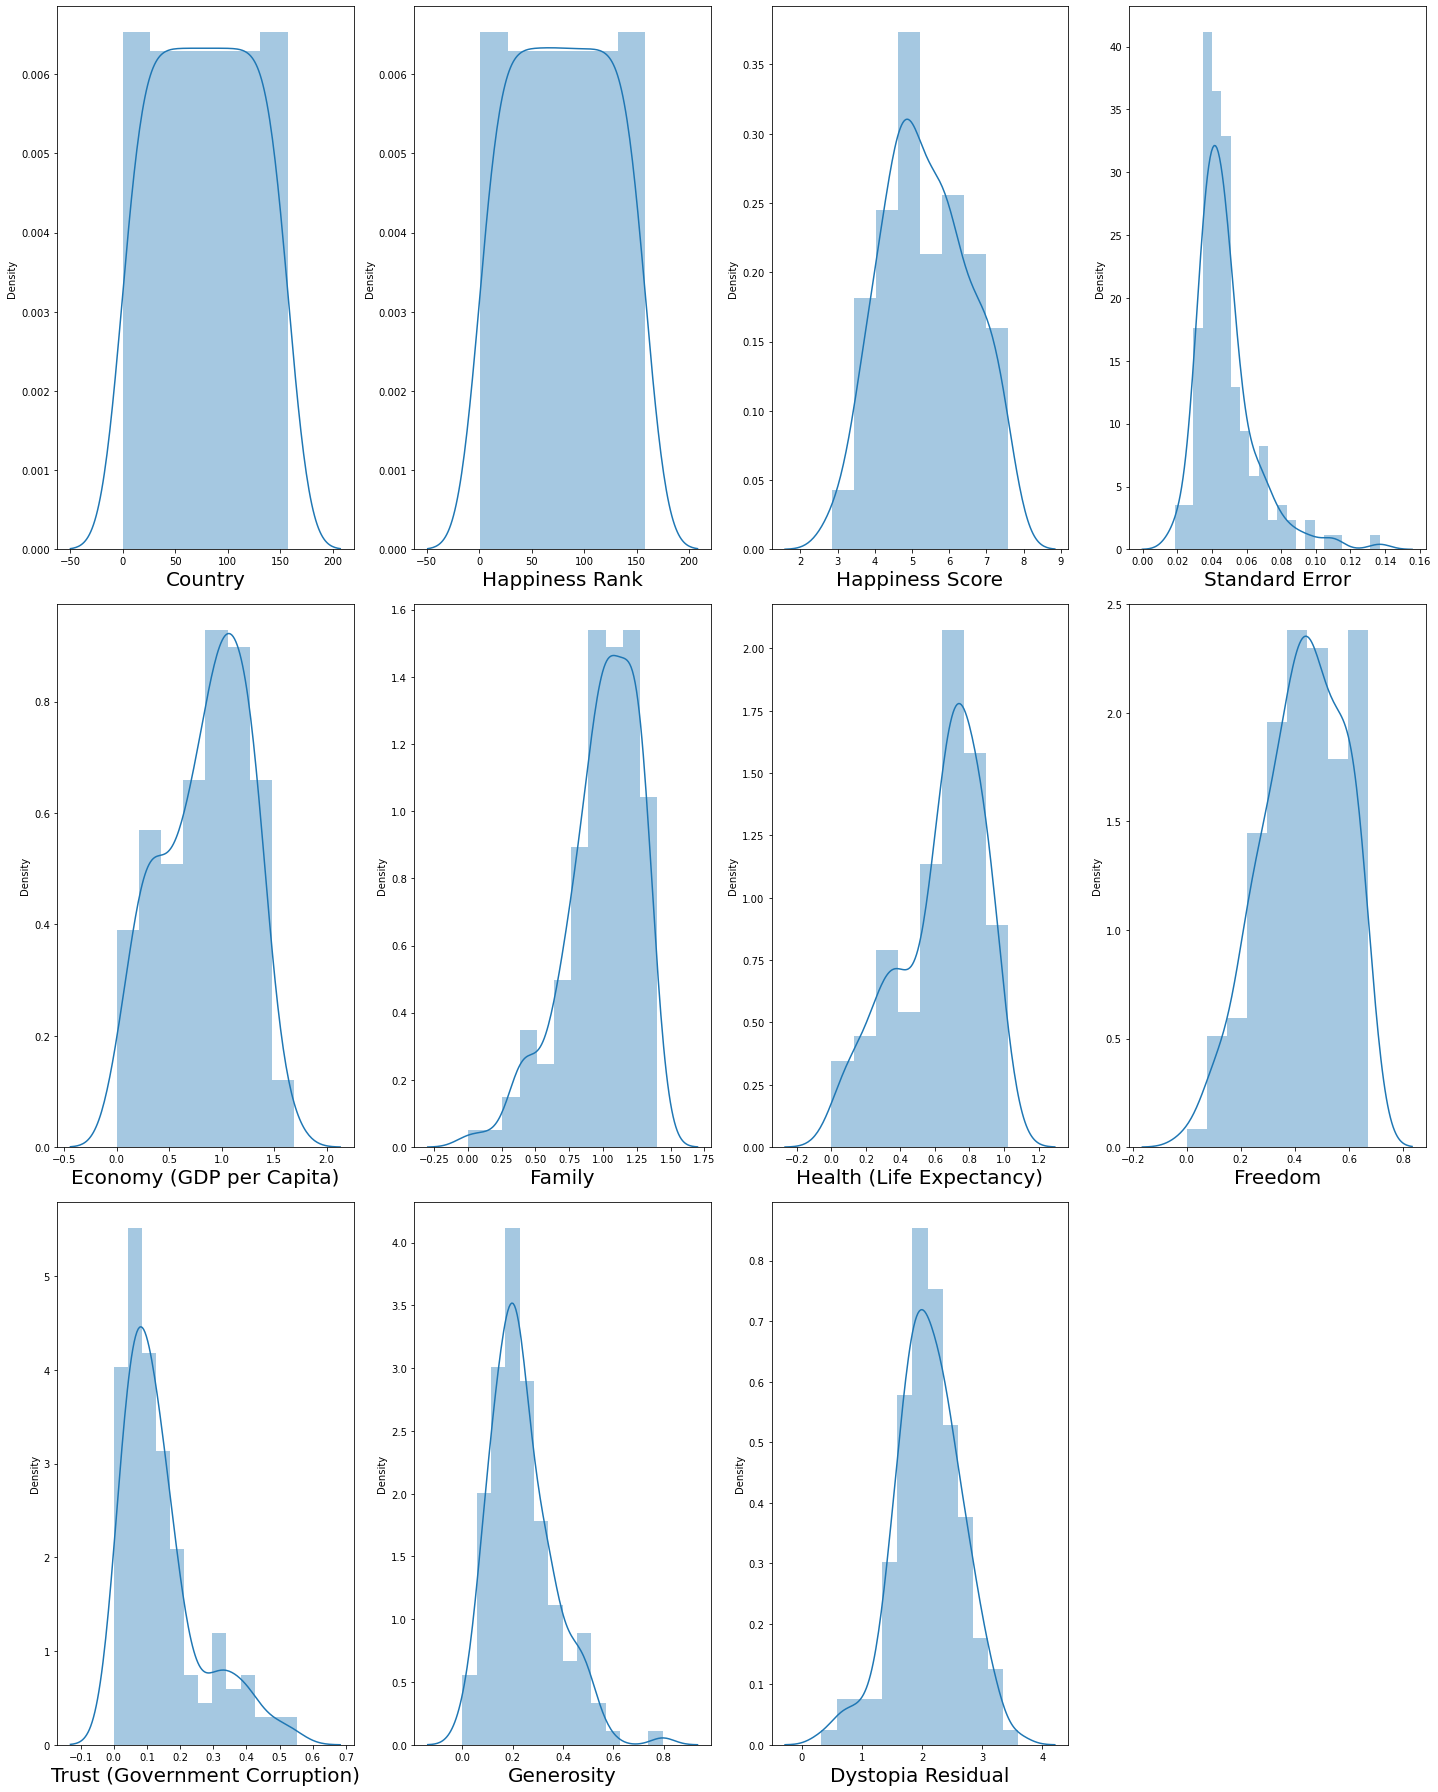

In [15]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1


for column in wh:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(wh[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()    


lets see how data is distributed for every columns.There are some columns are normally distributed and some are not.

In [16]:
wh.skew()

Country                          0.000000
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In this we can find that some skewness presented in columns Standard Error,Health(Life Expectation),Family,Trust,Generosity.So we can check the outliers using boxplot.

<AxesSubplot:xlabel='Standard Error'>

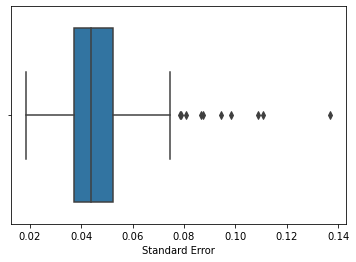

In [17]:
sns.boxplot(wh["Standard Error"])

<AxesSubplot:xlabel='Family'>

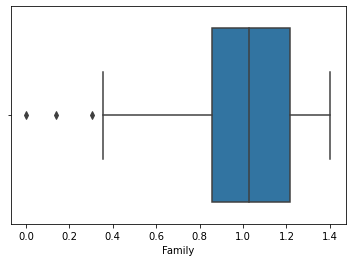

In [18]:
sns.boxplot(wh["Family"])

<AxesSubplot:xlabel='Health (Life Expectancy)'>

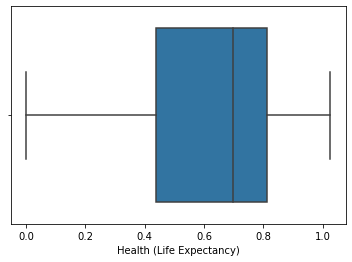

In [19]:
sns.boxplot(wh["Health (Life Expectancy)"])

<AxesSubplot:xlabel='Trust (Government Corruption)'>

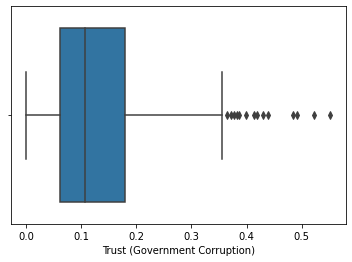

In [20]:
sns.boxplot(wh["Trust (Government Corruption)"])

<AxesSubplot:xlabel='Generosity'>

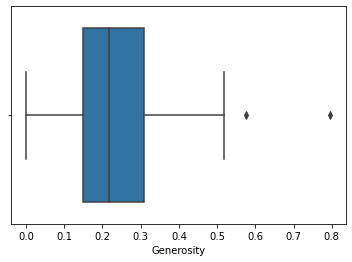

In [21]:
sns.boxplot(wh["Generosity"])

The above boxplots we can see that some ouliers presented.

In [22]:
zscr=np.abs(zscore(wh))

threshold=3
print(np.where(zscr>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  3,  3,  3,  9,  5,  8, 10,  5], dtype=int64))


In [23]:
# lets check the presence of outlier

print('shape before removing the outlier:',wh.shape)

wh_new=wh[(zscr<3).all (axis=1)]#removing the outlier 

print("shape after removing the outlier:",wh_new.shape)


shape before removing the outlier: (158, 11)
shape after removing the outlier: (149, 11)


In [24]:
wh=wh_new

Now datas are cleaned.

In [25]:
#lets see how data is distributed for every columns

plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1


for column in data_cleaned:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(wh[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.show()    


NameError: name 'data_cleaned' is not defined

<Figure size 1440x1800 with 0 Axes>

These are the final plot for data distribution.it is comparitivly better than the previous

In [ ]:
x = wh.drop(columns = ['Happiness Score'])
y= wh['Happiness Score']

Split the data

# Remove the Skewness

In [ ]:
df_new = power_transform(x)

df_new = pd.DataFrame(df_new,columns=x.columns)

In [ ]:
df_new.skew()

Skewness has been removed.

In [ ]:
x=df_new

In [ ]:
#scaler = StandardScaler()
#x=scaler.fit_transform(x)

Scale the input data using StandardScaler

In [ ]:
max_r_score=0
for r_state in range(40,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

It shows that we are getting acceptable level of r2 score in most of the cases and max value is also shown.

In [ ]:
cross_val_score(linear_model.LinearRegression(), x, y, cv=5,scoring="r2").mean()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=60,test_size=0.20)


since maximum r2 score is comming around random state 60 we will use that to create our final model

In [ ]:
def eval(x):
    mod= x
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    print("r2 score is: ",r2_score(y_test,y_pred))
    print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))
          


In [ ]:
eval(LinearRegression())

In [ ]:
eval(RandomForestRegressor())

In [ ]:
eval(SVR())

# Cross_Validation

In [ ]:
scr = cross_val_score(LinearRegression(),x,y,cv=3,scoring='r2')
print("cross validation score of LinearRegression model:",scr.mean())

LinearRegression is our best model

# Hyper parameter tuning

it is for tuning the model accuracy

In [ ]:
parameter={"n_jobs":np.arange(2,10),
          "normalize":["bool"]}

In [ ]:
gcv=GridSearchCV(LinearRegression(),parameter,cv=3)

In [ ]:
gcv.fit(x_train,y_train)

In [ ]:
gcv.best_params_

In [ ]:
final_mod =LinearRegression(n_jobs=2,normalize='bool')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

Now we can improve the accuracy from 92% to 99%

In [ ]:
import joblib
joblib.dump(final_mod,"happiness.pkl")

save the model in joblib